In [3]:

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import random


In [5]:
# 1. Load Dataset
X_train = pd.read_csv(r'D:\Arabic Handwritten Recognition\Arabic Handwritten Characters Dataset CSV\csvTrainImages 13440x1024.csv', header=None).values
y_train = pd.read_csv(r'D:\Arabic Handwritten Recognition\Arabic Handwritten Characters Dataset CSV\csvTrainLabel 13440x1.csv', header=None).values
X_test = pd.read_csv(r'D:\Arabic Handwritten Recognition\Arabic Handwritten Characters Dataset CSV\csvTestImages 3360x1024.csv', header=None).values
y_test = pd.read_csv(r'D:\Arabic Handwritten Recognition\Arabic Handwritten Characters Dataset CSV\csvTestLabel 3360x1.csv', header=None).values

In [6]:
# 2. Preprocess Data
X_train = X_train.reshape(-1, 32, 32, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 32, 32, 1).astype("float32") / 255.0

lb = LabelBinarizer()
y_train_enc = lb.fit_transform(y_train)
y_test_enc = lb.transform(y_test)


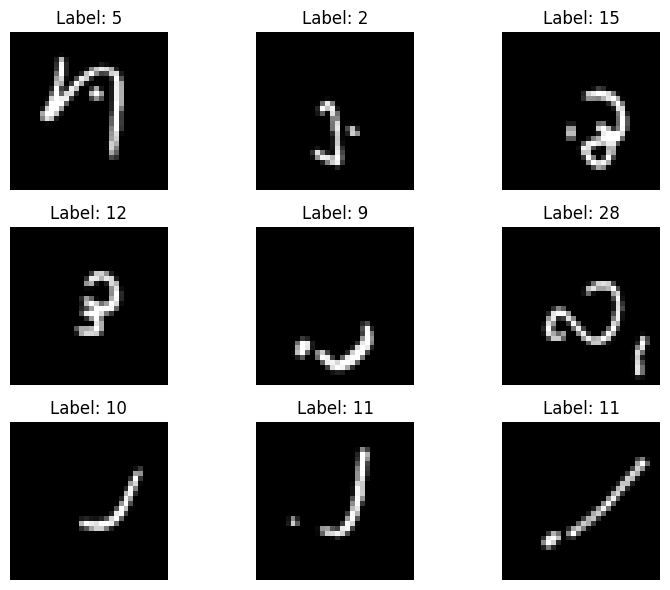

In [ ]:
# 3. Sample Images
plt.figure(figsize=(8, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    index = random.randint(0, len(X_train))
    plt.imshow(X_train[index].reshape(32, 32), cmap="gray")
    plt.title(f"Label: {y_train[index][0]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [8]:
#4. Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(lb.classes_), activation='softmax')
])


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(patience=3, restore_best_weights=True)


In [10]:
# 5. Train Model
history = model.fit(
    X_train, y_train_enc,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/20
168/168 [==============================] - 7s 34ms/step - loss: 2.4814 - accuracy: 0.2646 - val_loss: 1.6219 - val_accuracy: 0.5368
Epoch 2/20
168/168 [==============================] - 5s 33ms/step - loss: 1.5025 - accuracy: 0.5127 - val_loss: 1.0685 - val_accuracy: 0.6942
Epoch 3/20
168/168 [==============================] - 5s 33ms/step - loss: 1.0886 - accuracy: 0.6403 - val_loss: 0.7813 - val_accuracy: 0.7504
Epoch 4/20
168/168 [==============================] - 5s 32ms/step - loss: 0.8594 - accuracy: 0.7100 - val_loss: 0.6696 - val_accuracy: 0.7924
Epoch 5/20
168/168 [==============================] - 5s 32ms/step - loss: 0.7252 - accuracy: 0.7545 - val_loss: 0.6138 - val_accuracy: 0.8032
Epoch 6/20
168/168 [==============================] - 6s 33ms/step - loss: 0.6299 - accuracy: 0.7879 - val_loss: 0.5534 - val_accuracy: 0.8177
Epoch 7/20
168/168 [==============================] - 5s 32ms/step - loss: 0.5444 - accuracy: 0.8162 - val_loss: 0.5208 - val_accuracy: 0.8229

In [11]:
# 6. Evaluate Model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_enc, axis=1)


105/105 [==============================] - 1s 5ms/step


In [12]:
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes))
print("\nAccuracy:", accuracy_score(y_true, y_pred_classes))



Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       120
           1       0.93      0.97      0.95       120
           2       0.84      0.82      0.83       120
           3       0.86      0.82      0.84       120
           4       0.97      0.83      0.90       120
           5       0.84      0.93      0.88       120
           6       0.91      0.88      0.90       120
           7       0.87      0.93      0.90       120
           8       0.95      0.85      0.90       120
           9       0.86      1.00      0.93       120
          10       0.95      0.88      0.91       120
          11       0.94      0.92      0.93       120
          12       0.96      0.93      0.94       120
          13       0.84      0.95      0.89       120
          14       0.95      0.87      0.91       120
          15       0.88      0.93      0.90       120
          16       0.93      0.87      0.90       120
  

Text(0.5, 1.0, 'Accuracy')

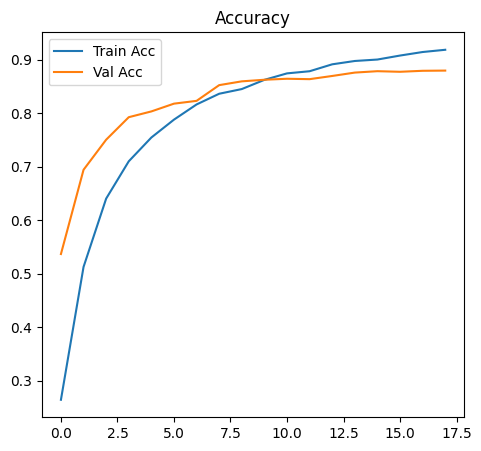

In [13]:
# 7. Plot Training/Validation Accuracy & Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")


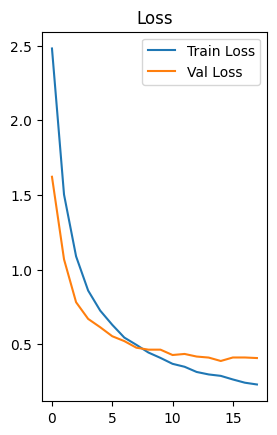

In [14]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()

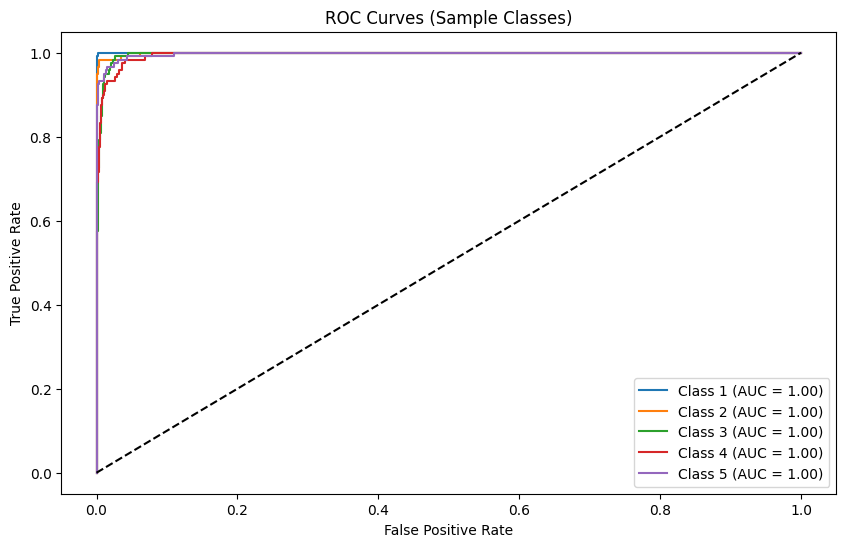

In [15]:
# 8. ROC Curve (for a few classes)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_enc[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label=f"Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Sample Classes)")
plt.legend()
plt.show()

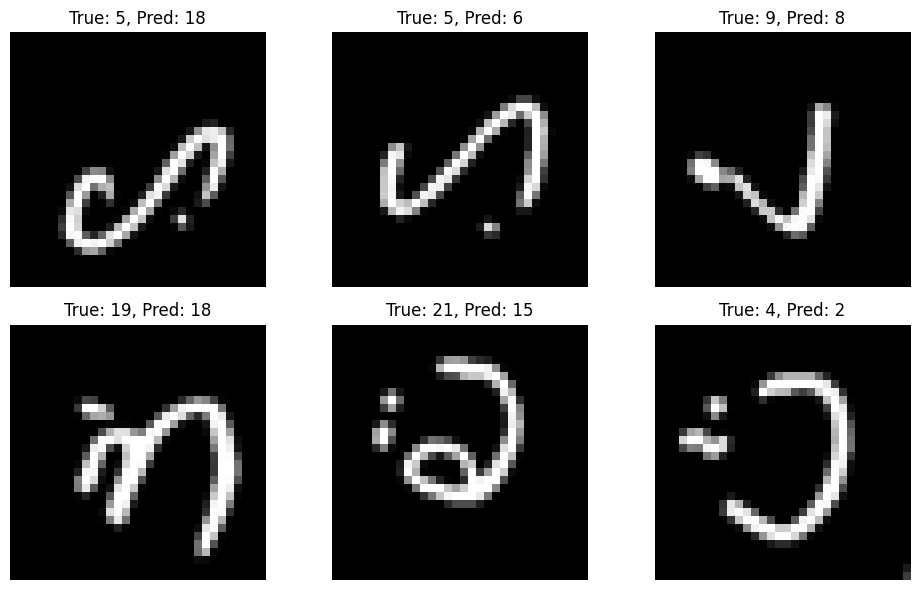

In [16]:
# 9. Visualize Misclassifications
misclassified_indices = np.where(y_true != y_pred_classes)[0]
plt.figure(figsize=(10, 6))
for i in range(6):
    idx = misclassified_indices[i]
    plt.subplot(2, 3, i+1)
    plt.imshow(X_test[idx].reshape(32, 32), cmap='gray')
    plt.title(f"True: {lb.classes_[y_true[idx]]}, Pred: {lb.classes_[y_pred_classes[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import joblib

model.save("saved_model_arabic_handwriting")

joblib.dump(lb, "label_binarizer.pkl")


INFO:tensorflow:Assets written to: saved_model_arabic_handwriting\assets


INFO:tensorflow:Assets written to: saved_model_arabic_handwriting\assets


['label_binarizer.pkl']